# Tratamiento de una imagen para convertirla en pintura 2


1. **OpenCV (cv2)**: Desarrollado originalmente por Intel en 1999 y desde entonces mantenido por una comunidad activa de desarrolladores de código abierto, OpenCV es una de las bibliotecas más utilizadas en el campo de la visión por computadora y el procesamiento de imágenes. En este código, se utiliza para cargar la imagen desde el disco.

2. **NumPy (np)**: Creado por Travis Oliphant en 2005 como parte del proyecto SciPy, NumPy es esencial en el ecosistema de Python para computación científica y análisis de datos. En este código, se utiliza para manipular y procesar la imagen cargada, ofreciendo herramientas eficientes para trabajar con matrices y arreglos multidimensionales.

3. **Matplotlib (plt)**: Originalmente creado por John D. Hunter en 2003 como parte de su tesis doctoral y mantenido por un equipo de desarrolladores de código abierto, Matplotlib es una de las bibliotecas más populares para visualización de datos en Python. En este contexto, se utiliza para mostrar la imagen cargada en una ventana gráfica.

La función `cv2.imread('picture.png')` carga la imagen desde la ruta especificada en el disco.

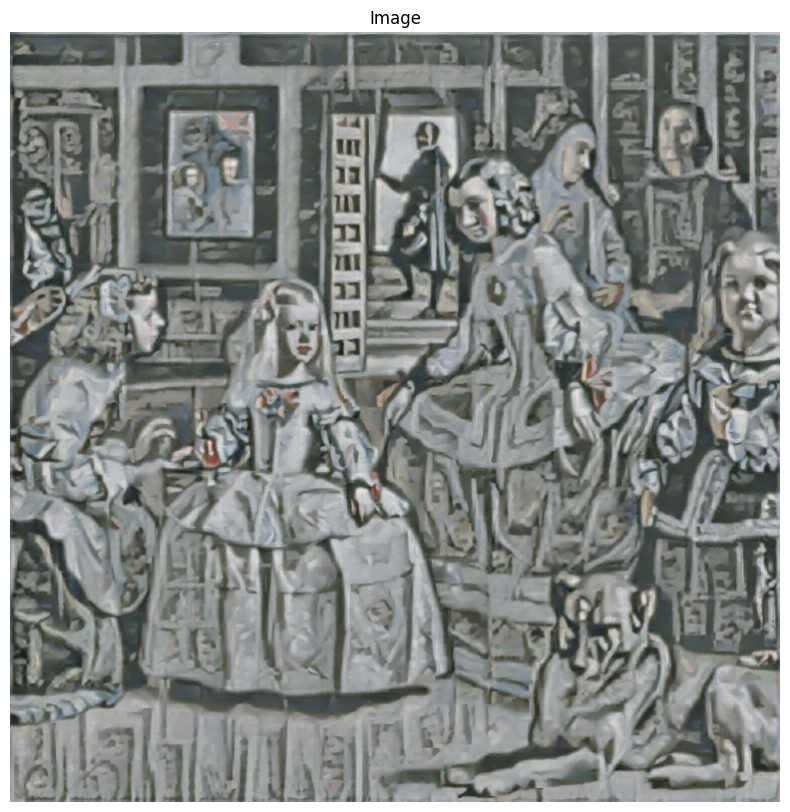

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'picture.png'
image = cv2.imread(image_path)

# Check if image is loaded successfully
if image is not None:
    # Display the image
    plt.figure(figsize=[10, 10]); plt.title("Image"); plt.axis('off'); plt.imshow(image[:, :, ::-1]); plt.show()
else:
    print("Failed to load the image. Please check the file path and ensure the image format is supported.")


Ahora vamos a redimensionar y a tratar la imagen:

1. **Redimensionamiento (cv2.resize)**: Esta función cambia el tamaño de la imagen. Los parámetros `fx` y `fy` son factores de escala para la anchura y la altura respectivamente. Al especificar `None` como el segundo argumento, se calcula automáticamente el tamaño de la imagen de salida basado en los factores de escala proporcionados. En este caso, la imagen se reduce a la mitad de su tamaño original.

2. **Filtrado de mediana (cv2.medianBlur)**: Esta función aplica un filtro de mediana para eliminar el ruido de la imagen. El segundo parámetro especifica el tamaño de la ventana del filtro, que debe ser un número impar. Un valor mayor suaviza más la imagen, eliminando más ruido.

3. **Filtro de preservación de bordes (cv2.edgePreservingFilter)**: Este filtro preserva los bordes mientras suaviza el resto de la imagen. `sigma_s` controla la intensidad del filtro. Un valor más alto preserva más los bordes.

4. **Filtro bilateral (cv2.bilateralFilter)**: Este filtro es útil para suavizar la imagen mientras se conservan los bordes. Los parámetros `d`, `sigmaColor` y `sigmaSpace` controlan respectivamente el tamaño del filtro, la variación de color y la variación espacial. Ajustar estos parámetros afectará la cantidad de suavizado y la preservación de bordes.

5. **Filtro Gaussiano (cv2.GaussianBlur)**: Aplica un filtro Gaussiano para suavizar la imagen. El tamaño del kernel `(7,7)` y `2` como desviación estándar `sigma` afecta la cantidad de suavizado. Un valor más alto para `sigma` produce un suavizado más intenso.

6. **Mezcla de imágenes (cv2.addWeighted)**: Combina dos imágenes ponderadas. En este caso, se utiliza para realzar los detalles de la imagen aplicando un efecto de enfoque. Los parámetros `alpha` y `beta` controlan la contribución relativa de cada imagen a la mezcla. 

Modificar estos parámetros puede afectar significativamente la apariencia final de la imagen, permitiendo ajustes personalizados para adaptarse a las necesidades específicas de procesamiento de imágenes.

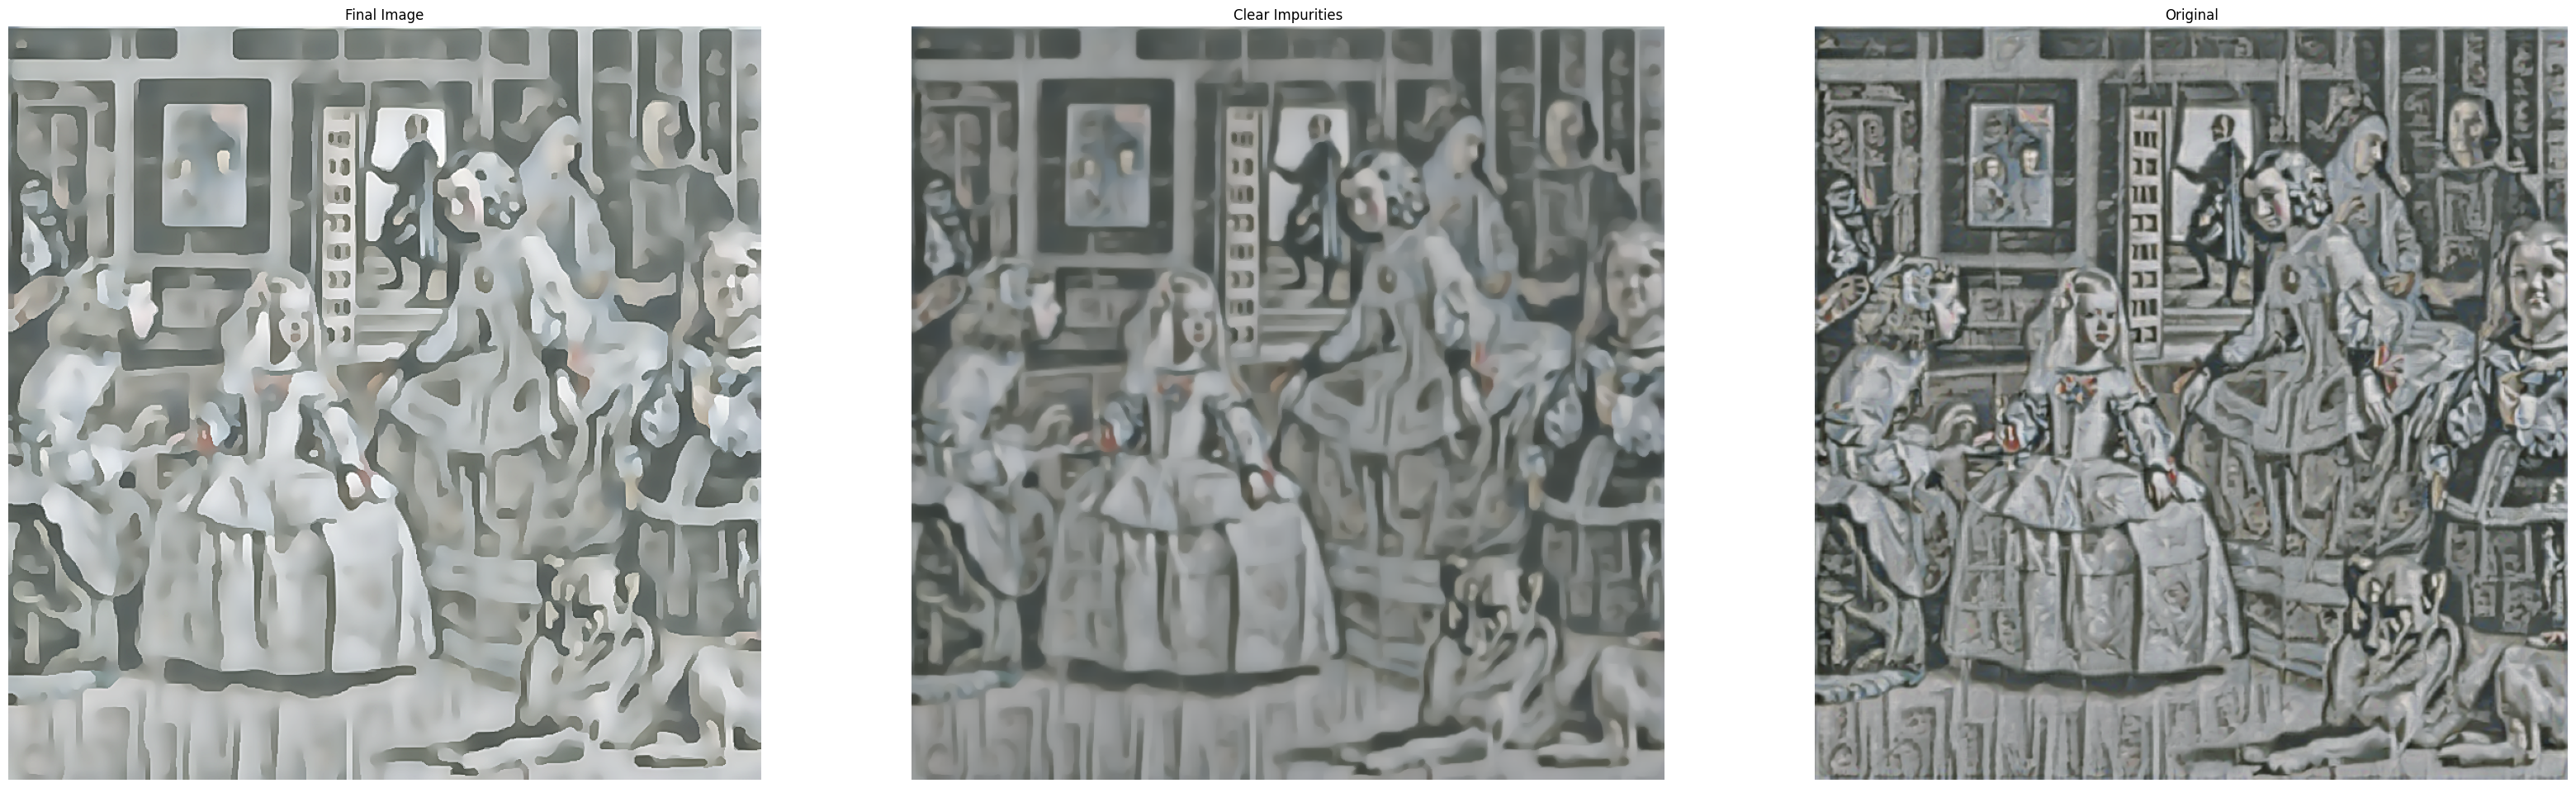

In [2]:
image_resized = cv2.resize(image,None, fx=1, fy=1)
image_cleared = cv2.medianBlur(image_resized,5)
image_cleared = cv2.medianBlur(image_cleared,5)
image_cleared = cv2.medianBlur(image_cleared,5)
image_cleared = cv2.edgePreservingFilter(image_cleared, sigma_s=10)

image_filtered = cv2.bilateralFilter(image_cleared, 5, 10, 5)

for i in range(2):
    image_filtered = cv2.bilateralFilter(image_filtered, 5, 20, 10)

for i in range(3):
    image_filtered = cv2.bilateralFilter(image_filtered, 10, 30, 10)

gaussian_mask= cv2.GaussianBlur(image_filtered, (7,7), 2)
image_sharp = cv2.addWeighted(image_filtered, 1.5, gaussian_mask, -0.5, 0)
image_sharp = cv2.addWeighted(image_sharp, 1.4, gaussian_mask, -0.2, 10)

plt.figure(figsize=[40,40])
plt.subplot(131);plt.imshow(image_sharp[:,:,::-1]);plt.title("Final Image");plt.axis('off');
plt.subplot(132);plt.imshow(image_cleared[:,:,::-1]);plt.title("Clear Impurities");plt.axis('off');
plt.subplot(133);plt.imshow(image[:,:,::-1]);plt.title("Original");plt.axis('off');
